In [143]:
# Libraries 
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ranksums
from BayesNet import BayesNet
from BNReasoner import BNReasoner
from matplotlib import pyplot as plt
from collections import defaultdict
from copy import deepcopy

# Set the path to the BIFXML file
path = 'OurCase.BIFxml'

# Load the network
net = BayesNet()
bn = BNReasoner(net)
net.load_from_bifxml(path)
bn_copy_marginal_1 = deepcopy(bn)
bn_copy_marginal_2 = deepcopy(bn)
bn_copy_map = deepcopy(bn)
bn_copy_mpe = deepcopy(bn)

['Thriller', 'Sci-Fi', 'Comedy', 'Drama', 'Angry', 'Sad', 'Happy', 'Stressed', 'Tired', 'Pessimistic', 'Lonely', 'Optimistic', 'Peaceful']


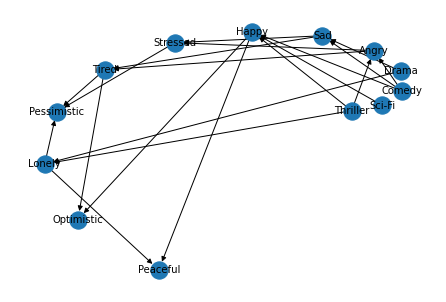

In [144]:
# Get the nodes in the network
print(net.get_all_variables())

# Draw the network
net.draw_structure()

## d-Separation & Independence

---
Since we assume that the graphs are _faithful_ this means that the opposite way also holds; so IF independent THEN d-separated. So let's check this with two examples: 
1. __IF__ d-separated, __THEN__ independent, which should give the same result as
2. __IF__ independent, __THEN__ d-seperated

__Important note:__ If X is NOT d-seperated of Y given Z, it is not guaranteed that X and Y are independent of each other given Z.

---

In [145]:
d_seperation = bn.d_separation(['Drama'], ['Sad'], ['Lonely'])
if d_seperation:
    print("No path is found between X and Y given Z, so X is d-seperated of Y given Z, meaning that X and Y are independent of each other given Z")
else:
    print("A path is found between X and Y given Z, so X is NOT d-seperated of Y given Z, meaning that it is not guaranteed that X and Y are independent of each other given Z")

A path is found between X and Y given Z, so X is NOT d-seperated of Y given Z, meaning that it is not guaranteed that X and Y are independent of each other given Z


In [146]:
inependence = bn.independence(['Comedy'], ['Angry'], ['Pessimistic'])
if inependence:
    print("X and Y are independent of each other given Z, so therefore X is d-seperated of Y given Z")
else:
    print("It is not guaranteed that X and Y are independent of each other given Z, so to check for d-seperation the specific function d_seperation() should be used")

It is not guaranteed that X and Y are independent of each other given Z, so to check for d-seperation the specific function d_seperation() should be used


In [147]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"

# Conditional Probability Table of Happy
display(net.get_cpt('Happy'))

# Conditional Probability Table of Lonely
display(net.get_cpt('Lonely'))

# Conditional Probability Table of Peaceful
display(net.get_cpt('Peaceful'))

,Sci-Fi,Thriller,Comedy,Happy,p
0,False,False,False,False,0.50
1,False,False,False,True,0.50
2,False,False,True,False,0.20
3,False,False,True,True,0.80
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.30
7,False,True,True,True,0.70
8,True,False,False,False,0.45
9,True,False,False,True,0.55


,Thriller,Drama,Lonely,p
0,False,False,False,0.5
1,False,False,True,0.5
2,False,True,False,0.4
3,False,True,True,0.6
4,True,False,False,0.2
5,True,False,True,0.8
6,True,True,False,0.1
7,True,True,True,0.9


,Happy,Lonely,Peaceful,p
0,False,False,False,0.50
1,False,False,True,0.50
2,False,True,False,0.70
3,False,True,True,0.30
4,True,False,False,0.10
5,True,False,True,0.90
6,True,True,False,0.05
7,True,True,True,0.95


## Marginalization

---

Given a factor and a variable X, compute the CPT in which X is summed-out. (3pts)
Given the Conditional Probability Table of the following 4 variables: <pre><code>Thriller Sci-Fi Comedy Happy
</code></pre> Where we will compute the new Conditional Probability Table with the following variable summed-out: <pre><code>Sci-Fi
</code></pre> 

---


In [148]:
# New Conditional Probability Table of Action summed-out
bn.marginalization(net.get_cpt('Happy'), ['Sci-Fi'])

,Thriller,Comedy,Happy,p
0,False,False,False,0.95
1,False,False,True,1.05
2,False,True,False,0.55
3,False,True,True,1.45
4,True,False,False,1.30
5,True,False,True,0.70
6,True,True,False,0.45
7,True,True,True,1.55


## Maxing-Out

---

Given the Conditional Probability Table of the following 4 variables: <pre><code>Thriller Sci-Fi Comedy Happy
</code></pre> We will compute the new Conditional Probability Table with the following variable maxed-out: <pre><code>Happy
</code></pre> 

---

In [149]:
# Original Conditional Probability Table of Happy
display(net.get_cpt('Happy'))

# New Conditional Probability Table of Happy summed-out
display(bn.maxing_out(net.get_cpt('Happy'), ['Happy'])[1])

,Sci-Fi,Thriller,Comedy,Happy,p
0,False,False,False,False,0.50
1,False,False,False,True,0.50
2,False,False,True,False,0.20
3,False,False,True,True,0.80
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.30
7,False,True,True,True,0.70
8,True,False,False,False,0.45
9,True,False,False,True,0.55


,Happy,Sci-Fi,Thriller,Comedy,p
0,False,True,True,True,0.70
1,True,True,True,True,0.85


## Factor multiplication 

---

Given the CPT's of the following two factors:

<pre><code>Lonely Drama</code></pre> 

We will compute the the CPT of the multiplied factor based on the aforementioned factors

---

In [150]:
# CPT of Lonely and Drama
display(net.get_cpt('Sad'))
display(net.get_cpt('Drama'))

# Factor Multiplication of CPT of Lonely and Drama
bn.factor_multiplication([net.get_cpt('Drama'), net.get_cpt('Sad')])

,Comedy,Drama,Sad,p
0,False,False,False,0.5
1,False,False,True,0.5
2,False,True,False,0.3
3,False,True,True,0.7
4,True,False,False,0.8
5,True,False,True,0.2
6,True,True,False,0.7
7,True,True,True,0.3


,Drama,p
0,False,0.3
1,True,0.7


,Comedy,Drama,Sad,p
0,False,False,False,0.15
1,False,False,True,0.15
2,False,True,False,0.21
3,False,True,True,0.49
4,True,False,False,0.24
5,True,False,True,0.06
6,True,True,False,0.49
7,True,True,True,0.21


## Ordering

---

Given a the set of variables in the Bayesian network of the lecture example, different ordering heuristics are used for the elimination of specific variables. Namely, random heuristics, min-degree heuristics and the min-fill heuristics.

---

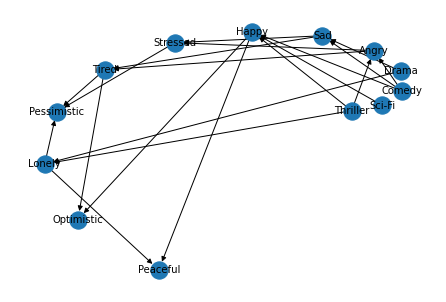

In [151]:
# Draw structure
net.draw_structure()

In [152]:
print("The result of the random heuristic is:", bn.order(net.get_all_variables(), "random"))
print("The result of the mindegree heuristic is:", bn.order(net.get_all_variables(), "mindegree"))
print("The result of the minfill heuristic is:", bn.order(net.get_all_variables(), "minfill"))

The result of the random heuristic is: ['Optimistic', 'Lonely', 'Comedy', 'Thriller', 'Angry', 'Sci-Fi', 'Sad', 'Stressed', 'Tired', 'Drama', 'Happy', 'Pessimistic', 'Peaceful']
The result of the mindegree heuristic is: ['Sci-Fi', 'Drama', 'Optimistic', 'Peaceful', 'Thriller', 'Comedy', 'Stressed', 'Happy', 'Angry', 'Sad', 'Tired', 'Pessimistic', 'Lonely']
The result of the minfill heuristic is: ['Sci-Fi', 'Drama', 'Optimistic', 'Peaceful', 'Thriller', 'Comedy', 'Happy', 'Angry', 'Sad', 'Stressed', 'Tired', 'Pessimistic', 'Lonely']


## Variable Elimination: Sum out a set of variables by using variable elimination

---

Given the Conditional Probability Table of the following 3 variables: <pre><code>Thriller Sci-Fi Comedy Happy 
</code></pre> We will compute the new Conditional Probability Table with the following variables summed-out: <pre><code> Thriller Sci-Fi
</code></pre> 

---

In [153]:
# Original CPT
display(net.get_cpt('Happy'))

# CPT with 'Action' and 'Adventure' summed-out
display(bn.variable_elimination(net.get_cpt('Happy'), ['Thriller', 'Sci-Fi']))

,Sci-Fi,Thriller,Comedy,Happy,p
0,False,False,False,False,0.50
1,False,False,False,True,0.50
2,False,False,True,False,0.20
3,False,False,True,True,0.80
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.30
7,False,True,True,True,0.70
8,True,False,False,False,0.45
9,True,False,False,True,0.55


,Comedy,Happy,p
0,False,False,2.25
1,False,True,1.75
2,True,False,1.00
3,True,True,3.00


## Network-Pruning

---

- Edge-pruning: Delete all outgoing edges that are in the Evidence 
- Node-Pruning: Delete all leaf nodes that are NOT in the Query or in the Evidence & repeat as often as possible


---

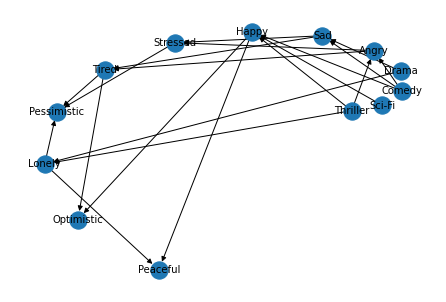

In [154]:
# Original Network
net.draw_structure()

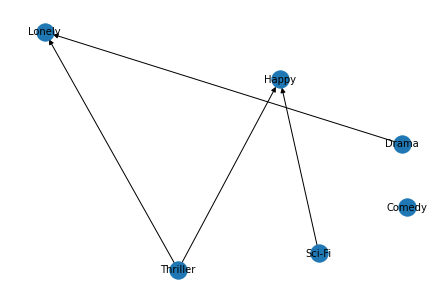

In [155]:
# # Network after pruning
bn.network_pruning(Query = ['Happy'], Evidence = pd.Series({'Comedy': True, 'Lonely': False}))
net.draw_structure()

## Marginal Distributions

---

Given a query $Q$ of variables and possibly empty evidence $e$, we compute the marginal distribution $P(Q|e)$. 
Note: $Q$ is a subset of the variables in the Bayesian network with $Q ⊂ X$ but can also be $Q = X$.


Given the Conditional Probability Table of: <pre><code>Happy
</code></pre> We will compute the new Marginal Probability Distribution with a random ordering heuristic


---

In [156]:
print(bn_copy_marginal_1.md_MAP_MPE(['Thriller', 'Lonely'], {}, "marginal", "random", prune = True))

   Thriller  Lonely      p
0     False   False  0.086
1     False    True  0.114
2      True   False  0.104
3      True    True  0.696


C:\Users\Acer\Documents\BN\KR21_project2\BNReasoner.py:276: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.network_pruning(Q, pd.Series(evidence))


 We will compute the posterior marginal Probability Distribution with a random ordering heuristic: <pre><code>Lonely
</code></pre> given the evidence of <pre><code>Thriller : True
</code></pre>

In [157]:
print(bn_copy_marginal_2.md_MAP_MPE(['Lonely'], {'Thriller' : True}, "marginal", "random", prune = True))

   Lonely     p
0   False  0.13
1    True  0.87


## Maximum A-Posteriory (MAP)

---

We compute the MAP instantiation & the value of the query variables $Q$, given a possibly empty evidence $e$. 

Given the Conditional Probability Table of: <pre><code>Optimistic
</code></pre> We will compute the new Maximum A-Posteriory Instantiation with a random ordering heuristic given the evidence of <pre><code>Sci-Fi : True
</code></pre>


---

In [158]:
# # With Drama  = True as evidence
bn_copy_map.md_MAP_MPE(['Optimistic'], {'Sci-Fi': True}, "MAP", "random", prune = True)

Optimistic       True
p             0.35092
Name: 1, dtype: object

## Most Probabible Explanation (MPE)

---

We compute the most probable explanation given an evidence $e$. Where the evidence is: <pre><code>Angry
</code></pre> We will compute the new Maximum A-Posteriory Instantiation with a random ordering heuristic


---

In [159]:
bn_copy_mpe.md_MAP_MPE([], {'Angry': True}, "MPE", "random", prune = True)

Comedy      False
Thriller     True
Angry        True
p           0.112
Name: 1, dtype: object